In [25]:
# Copyright 2019-2020 Steven Mattis and Troy Butler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import beta
import scipy.integrate.quadrature as quad
from luq.luq import *
from luq.dynamical_systems import PredatorPrey

import ipywidgets as wd
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'axes.linewidth': 2})

np.random.seed(123456)

Model is for a predator-prey system,
$$x'(t) = (b-py)x,$$
$$y'(t) = (rx-d)y$$
with $b \in [0.5, 1.5]$, $p \in [0.8, 1.2]$, $r \in [0.5, 1.2]$, and $d \in [0.8, 1.5]$.

The solution is given by
$$C = b \ln y(t)−py(t)−rx(t)+d \ln x(t)$$

where $C = b\ln y(0)−py(0)−rx(0)+d\ln x(0)$.

A ***true*** distribution of $x(0), y(0), b, p, r$, and $d$ are defined by (non-uniform)
Beta distributions and used to generate a set of time series data.

An ***initial*** uniform distribution is assumed and updated by the true time series data.

In [26]:
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(2E3)

num_params = 4
params_to_vary = [2, 3]
num_ics = 2

params = np.random.uniform(size=(num_samples, num_params))
ics = np.random.uniform(size=(num_samples, num_ics))

param_range = np.array([[1.0, 1.0], # b
                        [1.0, 1.0], # p
                        [0.8, 1.2], # r
                        [0.8, 1.2]]) # d
ic_range = np.array([[2.0, 2.0], # x(0)
                     [1.0, 1.0]]) # y(0)
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics
param_labels = [r'$b$', r'$p$', r'$r$', r'$d$']
ic_labels = [r'$x(0)$', r'$y(0)$']

# Construct the predicted time series data
num_time_preds = int(501)  # number of predictions (uniformly spaced) between [time_start,time_end]
time_start = 0.0
time_end = 6.0
times = np.linspace(time_start, time_end, num_time_preds)

phys = PredatorPrey()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

# Simulate an observed Beta distribution of time series data
num_obs = int(3E2)

true_a = 2
true_b = 2

# data generating distributions
params_obs = np.random.beta(size=(num_obs, num_params), a=true_a, b=true_b)
ics_obs = np.random.beta(size=(num_obs, num_ics), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

In [27]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 0
time_end_idx = num_time_preds-1

num_filtered_obs = 16

# Filter data with piecewise linear splines
learn.filter_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                     num_filtered_obs=num_filtered_obs, tol=5.0e-2, min_knots=3, max_knots=10)

0 4 0.10521522117370377
0 5 0.04563076263391032
0 6 0.026808361932697908
0 6 knots being used with error of 0.026808361932697908
1 4 0.13319244617674747
Optimization of knot locations failed. Using uniform knots.
1 5 0.17994911613863454
1 6 0.033270584604001736
1 7 0.03093524513211835
1 7 knots being used with error of 0.03093524513211835
2 4 0.13827569807676843
2 5 0.08816385411423512
2 6 0.037492194951646275
2 7 0.02824829353430114
2 7 knots being used with error of 0.02824829353430114
3 4 0.2153782652609011
3 5 0.11760876505441224
Optimization of knot locations failed. Using uniform knots.
3 6 0.2339425693042516
3 7 0.038557334145116286
3 8 0.03171156092836895
3 8 knots being used with error of 0.03171156092836895
4 4 0.19980860048740767
4 5 0.09347677410372242
4 6 0.07594766703864923
4 6 knots being used with error of 0.07594766703864923
5 4 0.09743139267477248
Optimization of knot locations failed. Using uniform knots.
5 5 0.15580870039758468
5 6 0.027193100031083606
5 7 0.0245785

47 6 0.08016195861092536
47 6 knots being used with error of 0.08016195861092536
48 4 0.08952239616218938
48 5 0.046539111039853906
48 6 0.025153009336209457
48 6 knots being used with error of 0.025153009336209457
49 4 0.12134559169425715
Optimization of knot locations failed. Using uniform knots.
49 5 0.1557013448288383
49 6 0.06526850240484813
49 7 0.027384774891998948
49 8 0.022287849324024
49 8 knots being used with error of 0.022287849324024
50 4 0.1792458028840079
50 5 0.10509982551566996
Optimization of knot locations failed. Using uniform knots.
50 6 0.18426528070478898
50 7 0.033672227471805115
50 8 0.030168234597143517
50 8 knots being used with error of 0.030168234597143517
51 4 0.097668563820182
Optimization of knot locations failed. Using uniform knots.
51 5 0.13380478907041274
51 6 0.030415618643066
51 7 0.023087308067457537
51 7 knots being used with error of 0.023087308067457537
52 4 0.21027344821379212
52 5 0.13585207627041124
52 6 0.05033856135142844
52 7 0.036915198

97 5 0.12893443790152925
97 6 0.051691458546440854
97 7 0.03758331775331918
97 7 knots being used with error of 0.03758331775331918
98 4 0.10901339531946734
98 5 0.07467874966254817
98 6 0.03033031447122112
98 7 0.023943312094456277
98 7 knots being used with error of 0.023943312094456277
99 4 0.16324678698163353
Optimization of knot locations failed. Using uniform knots.
99 5 0.2389735784618384
99 6 0.040904569088957586
Optimization of knot locations failed. Using uniform knots.
99 7 0.06622986962958263
99 8 0.028376205166530458
99 9 0.021969546825301632
99 9 knots being used with error of 0.021969546825301632
100 4 0.1540772174077659
100 5 0.09519961452830776
100 6 0.11172770276679342
100 6 knots being used with error of 0.11172770276679342
101 4 0.19807878550279015
101 5 0.11663598343879468
Optimization of knot locations failed. Using uniform knots.
101 6 0.20594089913317218
101 7 0.03560381278964224
101 8 0.03192351853233191
101 8 knots being used with error of 0.03192351853233191


143 4 0.21977843662800384
143 5 0.14158418246567975
143 6 0.052960390699344724
143 7 0.0388882681663278
143 7 knots being used with error of 0.0388882681663278
144 4 0.2128839550612615
144 5 0.10653556298065957
144 6 0.08852672230015125
144 6 knots being used with error of 0.08852672230015125
145 4 0.176519394543637
145 5 0.07527808259344666
Optimization of knot locations failed. Using uniform knots.
145 6 0.13657855731308005
145 7 0.034142414519917404
Optimization of knot locations failed. Using uniform knots.
145 8 0.08365385800037438
145 9 0.024430754726823208
145 10 0.019046629936195256
145 10 knots being used with error of 0.019046629936195256
146 4 0.15516747448307494
146 5 0.0932064251656769
Optimization of knot locations failed. Using uniform knots.
146 6 0.15645189134959647
146 7 0.030441205220605477
146 8 0.02681815073984022
146 8 knots being used with error of 0.02681815073984022
147 4 0.2044892478902363
147 5 0.1039153702999918
147 6 0.04855833432077066
147 7 0.038357592988

187 4 0.08947734332684472
187 5 0.047341272526909256
187 6 0.025276405005441368
187 6 knots being used with error of 0.025276405005441368
188 4 0.1588630448524951
188 5 0.11049559026994038
188 6 0.04029612247469607
Optimization of knot locations failed. Using uniform knots.
188 7 0.062031938422442326
188 8 0.027824794905618566
188 9 0.021687144180927955
188 9 knots being used with error of 0.021687144180927955
189 4 0.12133722731913749
189 5 0.08456893167631044
189 6 0.03270910215033727
189 7 0.025775462453394838
189 7 knots being used with error of 0.025775462453394838
190 4 0.12825212202612776
190 5 0.08482421446138676
190 6 0.0346874396662046
190 7 0.02662583267112121
190 7 knots being used with error of 0.02662583267112121
191 4 0.1534710067697522
Optimization of knot locations failed. Using uniform knots.
191 5 0.19882341161663852
Optimization of knot locations failed. Using uniform knots.
191 6 0.15893964736851546
191 7 0.030109240718597146
191 8 0.02649957987367589
191 8 knots b

231 6 0.07935936356447253
231 7 0.03166189909903143
Optimization of knot locations failed. Using uniform knots.
231 8 0.046157697900726546
231 8 knots being used with error of 0.046157697900726546
232 4 0.1320922697495065
232 5 0.09407178185943192
232 6 0.034218741090865784
232 7 0.026921882012942974
232 7 knots being used with error of 0.026921882012942974
233 4 0.2271407369197841
233 5 0.1200401122916066
233 6 0.10159548707051158
233 6 knots being used with error of 0.10159548707051158
234 4 0.19431798329775068
Optimization of knot locations failed. Using uniform knots.
234 5 0.270494112573972
234 6 0.04618638508158931
234 7 0.03561477908912905
234 7 knots being used with error of 0.03561477908912905
235 4 0.11322987847092159
235 5 0.04790175915487173
235 6 0.028208955729292197
235 6 knots being used with error of 0.028208955729292197
236 4 0.09231726207632825
236 5 0.05896031080228244
236 6 0.058779458736292756
236 6 knots being used with error of 0.058779458736292756
237 4 0.088347

280 4 0.0871601647984786
280 5 0.03538058239403972
280 6 0.022415561097379726
280 6 knots being used with error of 0.022415561097379726
281 4 0.2382074063611562
281 5 0.10417453798529404
281 6 0.06119022362670057
281 7 0.07444792198785448
281 8 0.033098759882982165
281 9 0.0291838284932878
281 9 knots being used with error of 0.0291838284932878
282 4 0.10959010351802735
Optimization of knot locations failed. Using uniform knots.
282 5 0.1556651499044149
282 6 0.02846842387828308
282 7 0.026187357184159005
282 7 knots being used with error of 0.026187357184159005
283 4 0.20333117574913562
Optimization of knot locations failed. Using uniform knots.
283 5 0.28829539372890867
283 6 0.0492658329105521
283 7 0.07685039966129353
283 7 knots being used with error of 0.07685039966129353
284 4 0.19682626529310598
284 5 0.1339543984778697
284 6 0.047681395818560686
284 7 0.03592183754701748
284 7 knots being used with error of 0.03592183754701748
285 4 0.20081186435944196
285 5 0.0977501233236056

328 4 0.23460893122819707
328 5 0.09510712328323793
328 6 0.0744445876176867
328 6 knots being used with error of 0.0744445876176867
329 4 0.220986585084768
329 5 0.10490730164583727
329 6 0.0859211599089821
329 6 knots being used with error of 0.0859211599089821
330 4 0.17544974445999517
330 5 0.1177042253685394
330 6 0.04375024576922865
330 7 0.03286760499924593
330 7 knots being used with error of 0.03286760499924593
331 4 0.10610316386808223
331 5 0.06829741231654192
331 6 0.030827735460547873
331 7 0.023887297762611892
331 7 knots being used with error of 0.023887297762611892
332 4 0.20121643208026968
332 5 0.13630690505287
332 6 0.04862636762879897
332 7 0.03651581773030276
332 7 knots being used with error of 0.03651581773030276
333 4 0.25696256730844685
333 5 0.09654509830699617
333 6 0.07381863902707327
333 7 0.06328216026635938
333 7 knots being used with error of 0.06328216026635938
334 4 0.20918311841446477
334 5 0.12641392399758858
Optimization of knot locations failed. Us

375 6 0.07630225002794622
375 6 knots being used with error of 0.07630225002794622
376 4 0.15870592770410494
376 5 0.22310309274172851
376 6 0.03999465789109532
376 7 0.030956896963857103
376 7 knots being used with error of 0.030956896963857103
377 4 0.0779029850169417
377 5 0.0317727850486535
377 6 0.020401743612335713
377 6 knots being used with error of 0.020401743612335713
378 4 0.18478369509863007
Optimization of knot locations failed. Using uniform knots.
378 5 0.22955661268257258
Optimization of knot locations failed. Using uniform knots.
378 6 0.1942337196623502
378 7 0.03438558324100621
Optimization of knot locations failed. Using uniform knots.
378 8 0.057580426802969195
378 9 0.02496167399931044
Optimization of knot locations failed. Using uniform knots.
378 10 0.055602697623570264
379 4 0.19446156627403277
Optimization of knot locations failed. Using uniform knots.
379 5 0.25516492453275336
379 6 0.04601673485046375
379 7 0.036277772534085054
379 7 knots being used with er

420 5 0.11932515281140005
420 6 0.10172803377233174
420 6 knots being used with error of 0.10172803377233174
421 4 0.14787699235041668
421 5 0.14289006258096185
421 5 knots being used with error of 0.14289006258096185
422 4 0.09181220535385104
Optimization of knot locations failed. Using uniform knots.
422 5 0.14211765371830593
422 6 0.025293419406142374
422 7 0.022722372165882666
422 7 knots being used with error of 0.022722372165882666
423 4 0.20534340733125564
423 5 0.2270580011479183
423 6 0.04934945263254984
423 7 0.03851110463957676
423 7 knots being used with error of 0.03851110463957676
424 4 0.14485170351383922
Optimization of knot locations failed. Using uniform knots.
424 5 0.21453679465861875
424 6 0.036740613345073246
424 7 0.03423646184466007
424 7 knots being used with error of 0.03423646184466007
425 4 0.1641841849402649
Optimization of knot locations failed. Using uniform knots.
425 5 0.23942974733998387
425 6 0.04067295590229807
425 7 0.03140030887325718
425 7 knots b

465 7 0.05816769006503343
465 7 knots being used with error of 0.05816769006503343
466 4 0.14569577060538608
466 5 0.09598657074971723
466 6 0.03825356008346116
466 7 0.029038919549245628
466 7 knots being used with error of 0.029038919549245628
467 4 0.22208801189670058
467 5 0.1211047700392548
467 6 0.12103239571453744
467 6 knots being used with error of 0.12103239571453744
468 4 0.14376603947747182
468 5 0.20948655054276188
468 6 0.03628633187213693
Optimization of knot locations failed. Using uniform knots.
468 7 0.06618050912911506
468 8 0.02538419406412611
468 9 0.020224203941989715
468 9 knots being used with error of 0.020224203941989715
469 4 0.17581503867168774
469 5 0.12556441636854754
469 6 0.042970225978997
469 7 0.06045160758474353
469 7 knots being used with error of 0.06045160758474353
470 4 0.21953124428044274
470 5 0.13097537713699942
Optimization of knot locations failed. Using uniform knots.
470 6 0.2230988512104994
470 7 0.03876584332650778
470 8 0.035429576354635

513 4 0.11017239855591723
Optimization of knot locations failed. Using uniform knots.
513 5 0.15026701942283882
513 6 0.05633817502520744
513 7 0.024589250995729037
513 8 0.020740210621315286
513 8 knots being used with error of 0.020740210621315286
514 4 0.13811297016717358
514 5 0.09402646543922603
514 6 0.036267503498960574
514 7 0.02798069883616843
514 7 knots being used with error of 0.02798069883616843
515 4 0.2321954023350155
515 5 0.11298774134291988
515 6 0.09351210091020998
515 6 knots being used with error of 0.09351210091020998
516 4 0.13896027434269995
516 5 0.09109649646120313
516 6 0.03716469956143164
516 7 0.028279824571540962
516 7 knots being used with error of 0.028279824571540962
517 4 0.1883263995581193
517 5 0.09796912122153373
517 6 0.05010644142876993
517 7 0.03531901183098646
517 7 knots being used with error of 0.03531901183098646
518 4 0.16702661609675817
518 5 0.0901160884768214
518 6 0.07598473657560431
518 6 knots being used with error of 0.075984736575604

559 7 0.03474170932614769
559 7 knots being used with error of 0.03474170932614769
560 4 0.15649268557335094
Optimization of knot locations failed. Using uniform knots.
560 5 0.21626932022881487
560 6 0.0383000507681692
560 7 0.030610476100664415
560 7 knots being used with error of 0.030610476100664415
561 4 0.1472887357465022
561 5 0.08778632085599686
561 6 0.04007087190263495
561 7 0.02941534060323476
561 7 knots being used with error of 0.02941534060323476
562 4 0.2155960348059781
562 5 0.10238902614487427
562 6 0.08356009796178886
562 6 knots being used with error of 0.08356009796178886
563 4 0.17582645545784042
563 5 0.08735786767632733
563 6 0.0720444066365705
563 6 knots being used with error of 0.0720444066365705
564 4 0.0909870183262439
564 5 0.06148998647758838
564 6 0.026913996173084598
564 7 0.021426585785109052
564 7 knots being used with error of 0.021426585785109052
565 4 0.1675726307179074
565 5 0.0777307079787442
565 6 0.06249969249385136
565 6 knots being used with e

605 9 0.019414595397927198
605 9 knots being used with error of 0.019414595397927198
606 4 0.14274126677512902
606 5 0.07277168601875442
606 6 0.041551507979963244
Optimization of knot locations failed. Using uniform knots.
606 7 0.09226039561978067
606 8 0.024749508001051232
606 9 0.020217563258812257
606 9 knots being used with error of 0.020217563258812257
607 4 0.15914465704944905
607 5 0.07315203735333249
607 6 0.03810380033253064
607 7 0.03594160724053784
607 7 knots being used with error of 0.03594160724053784
608 4 0.20051043260424647
608 5 0.09661269814791495
608 6 0.0792166276677051
608 6 knots being used with error of 0.0792166276677051
609 4 0.15353465188759322
609 5 0.10132405872246864
609 6 0.0398551906495256
609 7 0.030161355447865967
609 7 knots being used with error of 0.030161355447865967
610 4 0.18275839001395483
610 5 0.11982117508180783
610 6 0.0461810188187611
610 7 0.03462531839802921
610 7 knots being used with error of 0.03462531839802921
611 4 0.15729973228927

649 4 0.16609168635837332
649 5 0.0995964969509286
Optimization of knot locations failed. Using uniform knots.
649 6 0.16857170220049594
649 7 0.03168258936336179
649 8 0.02796623553542088
649 8 knots being used with error of 0.02796623553542088
650 4 0.21450461434573712
650 5 0.10617705240239227
650 6 0.08793391346651669
650 6 knots being used with error of 0.08793391346651669
651 4 0.12484946567738424
651 5 0.08935867150428128
651 6 0.03301394501496014
Optimization of knot locations failed. Using uniform knots.
651 7 0.05362850450548797
651 8 0.0230112231144558
651 9 0.018978019317977834
651 9 knots being used with error of 0.018978019317977834
652 4 0.1740567709221378
652 5 0.09205651068704801
652 6 0.0911067209583016
652 6 knots being used with error of 0.0911067209583016
653 4 0.08278003776411731
653 5 0.03546576581278155
653 6 0.021974002202639908
653 6 knots being used with error of 0.021974002202639908
654 4 0.09133020996000328
654 5 0.0372640430675298
654 6 0.02336902127891594

695 4 0.20542922153984056
695 5 0.0925558292306359
695 6 0.07429971956854207
695 6 knots being used with error of 0.07429971956854207
696 4 0.09165383100502712
696 5 0.03893147575113578
696 6 0.0237971786142239
696 6 knots being used with error of 0.0237971786142239
697 4 0.1349489484283022
697 5 0.07315286533666873
697 6 0.061389320395143256
697 6 knots being used with error of 0.061389320395143256
698 4 0.13921241987929217
698 5 0.08827896979893783
698 6 0.03770283303167452
698 7 0.02836119076124275
698 7 knots being used with error of 0.02836119076124275
699 4 0.15090821635229612
699 5 0.1967699322147919
699 6 0.037678018178413084
699 7 0.035227888128409705
699 7 knots being used with error of 0.035227888128409705
700 4 0.09146821583786502
Optimization of knot locations failed. Using uniform knots.
700 5 0.1364960788682514
700 6 0.024837955706373115
700 7 0.02234436208511625
700 7 knots being used with error of 0.02234436208511625
701 4 0.2014582427029511
Optimization of knot locati

744 7 0.030862419355636102
744 7 knots being used with error of 0.030862419355636102
745 4 0.15947216240038142
745 5 0.0816412229368966
745 6 0.04478322241782441
745 7 0.03161517004256295
745 7 knots being used with error of 0.03161517004256295
746 4 0.08094152644274673
Optimization of knot locations failed. Using uniform knots.
746 5 0.1302943851990727
746 6 0.023147893156823154
746 7 0.020482520346712402
746 7 knots being used with error of 0.020482520346712402
747 4 0.12058776567409994
747 5 0.09317035328361967
747 5 knots being used with error of 0.09317035328361967
748 4 0.14999513981690935
748 5 0.07544425571577713
748 6 0.0438676814181101
Optimization of knot locations failed. Using uniform knots.
748 7 0.09760134224873489
748 8 0.026084223289264713
748 9 0.021223129717387303
748 9 knots being used with error of 0.021223129717387303
749 4 0.1448882225237491
749 5 0.06803121950507304
749 6 0.054284768784500705
749 6 knots being used with error of 0.054284768784500705
750 4 0.2533

789 6 0.04265822655269418
789 7 0.04049081551069479
789 7 knots being used with error of 0.04049081551069479
790 4 0.2546310920019913
790 5 0.11399875382947852
790 6 0.09233752245458132
790 6 knots being used with error of 0.09233752245458132
791 4 0.1862433937221287
791 5 0.09295142387027137
791 6 0.044762790595171256
791 7 0.04268848403471667
791 7 knots being used with error of 0.04268848403471667
792 4 0.13873211446983874
792 5 0.0957423843412053
792 6 0.036143694288466886
792 7 0.028013573685073914
792 7 knots being used with error of 0.028013573685073914
793 4 0.12545777074020756
793 5 0.0566440022759593
793 6 0.031371583676657946
793 6 knots being used with error of 0.031371583676657946
794 4 0.24577255462272776
794 5 0.11006348113074821
794 6 0.08911673155087219
794 6 knots being used with error of 0.08911673155087219
795 4 0.16557801308100734
795 5 0.11405537749144938
795 6 0.044091007110473
795 7 0.03184521071338457
795 7 knots being used with error of 0.03184521071338457
796

836 6 0.03389689497583868
836 7 0.03155384658078979
836 7 knots being used with error of 0.03155384658078979
837 4 0.17587365756676585
837 5 0.12104420792802523
837 6 0.04360169799617003
837 7 0.03310535710296373
837 7 knots being used with error of 0.03310535710296373
838 4 0.20864566706456653
838 5 0.10805270944119479
Optimization of knot locations failed. Using uniform knots.
838 6 0.22416328330769547
838 7 0.03783522681881473
838 8 0.030903939328453353
838 8 knots being used with error of 0.030903939328453353
839 4 0.17292564186363948
839 5 0.08146032242827007
839 6 0.06597632301316049
839 6 knots being used with error of 0.06597632301316049
840 4 0.1905020117456341
840 5 0.10395657313486266
840 6 0.10395030555357451
840 6 knots being used with error of 0.10395030555357451
841 4 0.14076977948721445
841 5 0.07296997842235378
841 6 0.040846015989696005
841 7 0.029066351580745418
841 7 knots being used with error of 0.029066351580745418
842 4 0.14664217355828418
842 5 0.14324019840420

883 5 0.09726058975046131
883 6 0.08266001670111754
883 6 knots being used with error of 0.08266001670111754
884 4 0.14267073375850892
884 5 0.0963118457009359
884 6 0.03739799989392355
884 7 0.028690209887834613
884 7 knots being used with error of 0.028690209887834613
885 4 0.17610007836787236
Optimization of knot locations failed. Using uniform knots.
885 5 0.25560478080317167
885 6 0.04364105332135293
885 7 0.03317758233176322
885 7 knots being used with error of 0.03317758233176322
886 4 0.16841629814832978
886 5 0.11904802344197807
886 6 0.04156428493890307
886 7 0.0320255982082023
886 7 knots being used with error of 0.0320255982082023
887 4 0.16171805432507858
887 5 0.11234052817283745
887 6 0.04067121092547744
887 7 0.03134044714883507
887 7 knots being used with error of 0.03134044714883507
888 4 0.12966878963524228
888 5 0.06123911650635631
888 6 0.0603469028179482
888 6 knots being used with error of 0.0603469028179482
889 4 0.0729495485374995
889 5 0.029321653047470874
889

929 5 0.13448256124818844
Optimization of knot locations failed. Using uniform knots.
929 6 0.2412951416446318
929 7 0.04078855211617355
Optimization of knot locations failed. Using uniform knots.
929 8 0.07656066592163333
929 9 0.029695972472607447
929 10 0.02514572256444176
929 10 knots being used with error of 0.02514572256444176
930 4 0.17288879580980923
930 5 0.0970918445961178
930 6 0.08284718076968438
930 6 knots being used with error of 0.08284718076968438
931 4 0.11687078429077626
931 5 0.07878104991289822
931 6 0.03231568756555188
931 7 0.02524213252641452
931 7 knots being used with error of 0.02524213252641452
932 4 0.13077416092901534
932 5 0.07842288133108642
932 6 0.06808784319978163
932 6 knots being used with error of 0.06808784319978163
933 4 0.1892321039684792
Optimization of knot locations failed. Using uniform knots.
933 5 0.26377950808429446
933 6 0.04532802507458433
933 7 0.03509673552339116
933 7 knots being used with error of 0.03509673552339116
934 4 0.1686066

975 4 0.12536243977511924
975 5 0.08888361104482312
975 6 0.03325093380081046
975 7 0.026286172929078
975 7 knots being used with error of 0.026286172929078
976 4 0.22764611713056593
976 5 0.11195394436703063
976 6 0.09285688175561235
976 6 knots being used with error of 0.09285688175561235
977 4 0.16484778199831335
Optimization of knot locations failed. Using uniform knots.
977 5 0.23501038647637115
977 6 0.040832770752210965
Optimization of knot locations failed. Using uniform knots.
977 7 0.08102200074530505
977 8 0.028722482667502207
977 9 0.02180083184718507
977 9 knots being used with error of 0.02180083184718507
978 4 0.21574574988637493
978 5 0.1277902147017487
Optimization of knot locations failed. Using uniform knots.
978 6 0.22227055405792626
978 7 0.03831643981489582
978 8 0.03476887951461064
978 8 knots being used with error of 0.03476887951461064
979 4 0.09050723522356151
979 5 0.06965063221846063
979 5 knots being used with error of 0.06965063221846063
980 4 0.1529429988

1021 4 0.13566181872276073
1021 5 0.061179860038332715
1021 6 0.03335497418000189
1021 6 knots being used with error of 0.03335497418000189
1022 4 0.21296845752472765
1022 5 0.12525268838080997
1022 6 0.10916228244423529
1022 6 knots being used with error of 0.10916228244423529
1023 4 0.1507530941401793
1023 5 0.09487758564222275
1023 6 0.03994550348589691
1023 7 0.02967660056990032
1023 7 knots being used with error of 0.02967660056990032
1024 4 0.20802504994343554
1024 5 0.12524277680837634
Optimization of knot locations failed. Using uniform knots.
1024 6 0.2081977641167148
1024 7 0.037417484347798104
1024 8 0.03403319553291604
1024 8 knots being used with error of 0.03403319553291604
1025 4 0.117852198284016
Optimization of knot locations failed. Using uniform knots.
1025 5 0.15176856042752251
1025 6 0.05805994634597633
1025 7 0.025868827213946132
1025 8 0.02203927485384326
1025 8 knots being used with error of 0.02203927485384326
1026 4 0.12616196078735475
1026 5 0.088138134215848

1068 4 0.21236874613293874
Optimization of knot locations failed. Using uniform knots.
1068 5 0.3018579609543437
1068 6 0.050612056709458196
1068 7 0.03796823371177841
1068 7 knots being used with error of 0.03796823371177841
1069 4 0.09778211488817218
1069 5 0.040930844782628394
1069 6 0.02497846825406456
1069 6 knots being used with error of 0.02497846825406456
1070 4 0.1495621123957539
1070 5 0.09948097664226166
1070 6 0.03897332362666834
1070 7 0.029600619465087602
1070 7 knots being used with error of 0.029600619465087602
1071 4 0.1684772538930508
1071 5 0.07728095276794773
1071 6 0.061928609629008605
1071 6 knots being used with error of 0.061928609629008605
1072 4 0.2081971908900078
1072 5 0.10151386010137943
1072 6 0.08364319299210585
1072 6 knots being used with error of 0.08364319299210585
1073 4 0.14656305469067987
1073 5 0.06502158881787486
1073 6 0.05102457647393381
1073 6 knots being used with error of 0.05102457647393381
1074 4 0.10848736018916211
1074 5 0.07146147349515

1119 7 0.03632346140195033
1119 8 0.03002359516317155
1119 8 knots being used with error of 0.03002359516317155
1120 4 0.23291663339433796
1120 5 0.1132733519088688
1120 6 0.09374040967394238
1120 6 knots being used with error of 0.09374040967394238
1121 4 0.1227024184138966
1121 5 0.05970063495294792
Optimization of knot locations failed. Using uniform knots.
1121 6 0.1270364095616046
1121 7 0.04710763463845409
1121 8 0.02202473144707781
1121 9 0.017610734428274582
1121 9 knots being used with error of 0.017610734428274582
1122 4 0.18389281036398397
Optimization of knot locations failed. Using uniform knots.
1122 5 0.24478751335127516
1122 6 0.04395614381040464
1122 7 0.034417361608751966
1122 7 knots being used with error of 0.034417361608751966
1123 4 0.1417255065063542
1123 5 0.07968589323208651
1123 6 0.06776651834519563
1123 6 knots being used with error of 0.06776651834519563
1124 4 0.09951623938836136
1124 5 0.0679102358492771
1124 5 knots being used with error of 0.06791023584

1163 9 0.025549974794089686
1163 9 knots being used with error of 0.025549974794089686
1164 4 0.12494460539005442
1164 5 0.06536703443757141
1164 6 0.06526035558897475
1164 6 knots being used with error of 0.06526035558897475
1165 4 0.21876318455721586
1165 5 0.13285316779065812
Optimization of knot locations failed. Using uniform knots.
1165 6 0.21680036329740363
1165 7 0.03862105940001914
1165 8 0.03513967483611426
1165 8 knots being used with error of 0.03513967483611426
1166 4 0.20677321527519127
1166 5 0.2578212298397188
1166 6 0.049080273980286776
1166 7 0.04697170068002264
1166 7 knots being used with error of 0.04697170068002264
1167 4 0.13326250605724227
1167 5 0.06981715027563781
1167 6 0.06975102288491215
1167 6 knots being used with error of 0.06975102288491215
1168 4 0.14056648651303208
1168 5 0.06503769243455548
1168 6 0.034616714846276694
1168 7 0.03241481073187269
1168 7 knots being used with error of 0.03241481073187269
1169 4 0.171574288494345
Optimization of knot loc

1203 8 0.0321849286399596
1203 8 knots being used with error of 0.0321849286399596
1204 4 0.16417164392737274
Optimization of knot locations failed. Using uniform knots.
1204 5 0.2393221194289586
1204 6 0.0410583768154746
1204 7 0.03169813002873287
1204 7 knots being used with error of 0.03169813002873287
1205 4 0.14337175796102078
1205 5 0.06696733012900986
1205 6 0.03538159988671051
1205 7 0.033232986951552086
1205 7 knots being used with error of 0.033232986951552086
1206 4 0.15494231503641262
1206 5 0.07320907442502385
1206 6 0.05901085695593607
1206 6 knots being used with error of 0.05901085695593607
1207 4 0.17825846196600506
1207 5 0.08282539295323381
1207 6 0.0668274988964167
1207 6 knots being used with error of 0.0668274988964167
1208 4 0.13848566140855215
Optimization of knot locations failed. Using uniform knots.
1208 5 0.18775581406320188
1208 6 0.03464845461078618
1208 7 0.03241196168639766
1208 7 knots being used with error of 0.03241196168639766
1209 4 0.10278020450679

1250 4 0.1357534505337104
1250 5 0.0595535648674325
1250 6 0.0332174004219005
1250 6 knots being used with error of 0.0332174004219005
1251 4 0.19169467311864005
1251 5 0.086528321654454
1251 6 0.06935200442216612
1251 6 knots being used with error of 0.06935200442216612
1252 4 0.09372623504574568
1252 5 0.03962274754162356
1252 6 0.024195828283080062
1252 6 knots being used with error of 0.024195828283080062
1253 4 0.21544360756370443
1253 5 0.1461009147014822
1253 6 0.05021085341664413
1253 7 0.03739069490776968
1253 7 knots being used with error of 0.03739069490776968
1254 4 0.15500429295421556
1254 5 0.06845801336177898
1254 6 0.0538312393497566
1254 6 knots being used with error of 0.0538312393497566
1255 4 0.16013249887635547
1255 5 0.08530085190544376
1255 6 0.08546952121812397
1255 6 knots being used with error of 0.08546952121812397
1256 4 0.20636720420164703
1256 5 0.12439041420546028
Optimization of knot locations failed. Using uniform knots.
1256 6 0.20631609190832795
1256 

1297 6 0.05572962858419049
1297 7 0.039168185046973114
1297 7 knots being used with error of 0.039168185046973114
1298 4 0.1748661402421209
Optimization of knot locations failed. Using uniform knots.
1298 5 0.249981528422539
1298 6 0.0433671126136938
1298 7 0.04055499078453085
1298 7 knots being used with error of 0.04055499078453085
1299 4 0.1789265043793727
1299 5 0.09376079749850195
1299 6 0.043461646112792345
1299 7 0.0341155230006165
1299 7 knots being used with error of 0.0341155230006165
1300 4 0.21876324834025343
1300 5 0.1313075300618003
Optimization of knot locations failed. Using uniform knots.
1300 6 0.22093215486540932
1300 7 0.038590755617501325
1300 8 0.035157990732897264
1300 8 knots being used with error of 0.035157990732897264
1301 4 0.10172048605904059
Optimization of knot locations failed. Using uniform knots.
1301 5 0.15230148766592813
1301 6 0.02701032064606046
1301 7 0.024718082528068234
1301 7 knots being used with error of 0.024718082528068234
1302 4 0.21379719

1342 6 0.04237021153254745
Optimization of knot locations failed. Using uniform knots.
1342 7 0.0780735584157359
1342 8 0.02965931039600064
1342 9 0.022396080446935637
1342 9 knots being used with error of 0.022396080446935637
1343 4 0.18428896106971393
1343 5 0.07736303000475693
1343 6 0.06029144380345345
1343 6 knots being used with error of 0.06029144380345345
1344 4 0.18595291379187648
1344 5 0.10626734531489036
Optimization of knot locations failed. Using uniform knots.
1344 6 0.19728719143508022
1344 7 0.034675922142631564
Optimization of knot locations failed. Using uniform knots.
1344 8 0.05394478401274398
1344 9 0.025188137827735626
Optimization of knot locations failed. Using uniform knots.
1344 10 0.05754030632945794
1345 4 0.16954243026393626
1345 5 0.10374218275629378
1345 6 0.13784720598989264
1345 6 knots being used with error of 0.13784720598989264
1346 4 0.08855902147694897
1346 5 0.03822101579738213
1346 6 0.023298245292569526
1346 6 knots being used with error of 0.0

1389 7 0.02420910893927777
1389 8 0.021014627297036712
1389 8 knots being used with error of 0.021014627297036712
1390 4 0.11042617463067714
1390 5 0.0724860547901708
1390 6 0.03144442646267005
1390 7 0.024419147084428876
1390 7 knots being used with error of 0.024419147084428876
1391 4 0.18791796492643698
Optimization of knot locations failed. Using uniform knots.
1391 5 0.24390316602648762
1391 6 0.04476325413822561
1391 7 0.035512847585538694
1391 7 knots being used with error of 0.035512847585538694
1392 4 0.16707890978954384
1392 5 0.07378687845757201
1392 6 0.05830343943187707
1392 6 knots being used with error of 0.05830343943187707
1393 4 0.1622341935536477
1393 5 0.10235527199760314
1393 6 0.04276639977697626
1393 7 0.03169880149391578
1393 7 knots being used with error of 0.03169880149391578
1394 4 0.08690602441523389
1394 5 0.04166895933803601
1394 6 0.023903923422714947
1394 6 knots being used with error of 0.023903923422714947
1395 4 0.08649659097508951
1395 5 0.0681349455

1435 4 0.09184490218496238
1435 5 0.05918275421202477
Optimization of knot locations failed. Using uniform knots.
1435 6 0.08844407187930492
1435 7 0.021881944911354353
1435 8 0.018228706623001897
1435 8 knots being used with error of 0.018228706623001897
1436 4 0.08557470745635432
1436 5 0.05750871841691468
1436 5 knots being used with error of 0.05750871841691468
1437 4 0.12750266413800404
1437 5 0.08055847106214674
Optimization of knot locations failed. Using uniform knots.
1437 6 0.11866345155054177
1437 7 0.026783678314106687
1437 8 0.023181452219062426
1437 8 knots being used with error of 0.023181452219062426
1438 4 0.11053571942594868
1438 5 0.05592152188390061
Optimization of knot locations failed. Using uniform knots.
1438 6 0.11934658028363233
Optimization of knot locations failed. Using uniform knots.
1438 7 0.077451029608592
1438 8 0.021635048792488173
1438 9 0.01695592303197753
1438 9 knots being used with error of 0.01695592303197753
1439 4 0.10247925470570211
1439 5 0.0

1481 5 0.09844339369072572
1481 6 0.03891988999977565
1481 7 0.029543903464489985
1481 7 knots being used with error of 0.029543903464489985
1482 4 0.09568508995212151
1482 5 0.06078775965308995
Optimization of knot locations failed. Using uniform knots.
1482 6 0.09473975276097062
1482 7 0.02242877308450917
1482 8 0.01870435110407529
1482 8 knots being used with error of 0.01870435110407529
1483 4 0.16075495083541866
Optimization of knot locations failed. Using uniform knots.
1483 5 0.22550167267364868
1483 6 0.03938139017827305
1483 7 0.031179244348105553
1483 7 knots being used with error of 0.031179244348105553
1484 4 0.12157742914340788
Optimization of knot locations failed. Using uniform knots.
1484 5 0.16801628277115488
1484 6 0.03100002869843201
1484 7 0.028680411673900327
1484 7 knots being used with error of 0.028680411673900327
1485 4 0.17041813909196687
1485 5 0.11268688242323575
1485 6 0.04349303871086847
1485 7 0.032775178407345
1485 7 knots being used with error of 0.0327

1525 6 0.05261601824724386
1525 6 knots being used with error of 0.05261601824724386
1526 4 0.22370299361303686
1526 5 0.11973098427079458
Optimization of knot locations failed. Using uniform knots.
1526 6 0.24331806854532853
1526 7 0.03935055030607721
1526 8 0.03202774111176387
1526 8 knots being used with error of 0.03202774111176387
1527 4 0.17657354571943007
1527 5 0.09928486275920685
1527 6 0.08483458180701355
1527 6 knots being used with error of 0.08483458180701355
1528 4 0.2600079150890873
1528 5 0.09973935209135028
1528 6 0.07682904551215423
1528 7 0.06626367797021371
1528 7 knots being used with error of 0.06626367797021371
1529 4 0.196836208653519
1529 5 0.1220524222461015
1529 6 0.04911175806435369
1529 7 0.03583674703150411
1529 7 knots being used with error of 0.03583674703150411
1530 4 0.10386059079833408
1530 5 0.07045019666844789
1530 5 knots being used with error of 0.07045019666844789
1531 4 0.12897038691566542
1531 5 0.0561194155773246
1531 6 0.03179495086131496
153

1570 4 0.21316246137789244
1570 5 0.14664046627295885
1570 6 0.050528667430405724
1570 7 0.03809425918381851
1570 7 knots being used with error of 0.03809425918381851
1571 4 0.14025840139798895
1571 5 0.07396144267276357
1571 6 0.07423862521835674
1571 6 knots being used with error of 0.07423862521835674
1572 4 0.18093515735677337
Optimization of knot locations failed. Using uniform knots.
1572 5 0.24973088056344764
1572 6 0.0441772784257766
1572 7 0.034536184124183904
1572 7 knots being used with error of 0.034536184124183904
1573 4 0.136274098654666
Optimization of knot locations failed. Using uniform knots.
1573 5 0.18816297734758797
1573 6 0.034320233789958306
1573 7 0.03202488979494912
1573 7 knots being used with error of 0.03202488979494912
1574 4 0.1439491540831763
1574 5 0.08762916277512618
Optimization of knot locations failed. Using uniform knots.
1574 6 0.13946983814182587
1574 7 0.028626553173767007
1574 8 0.02510938164106692
1574 8 knots being used with error of 0.0251093

1614 7 0.025890737564198185
1614 7 knots being used with error of 0.025890737564198185
1615 4 0.1696574200448337
1615 5 0.20095102939760826
Optimization of knot locations failed. Using uniform knots.
1615 6 0.1769914021117548
1615 7 0.03286136177187861
1615 8 0.029100896395532424
1615 8 knots being used with error of 0.029100896395532424
1616 4 0.12643581433722442
1616 5 0.08004715263711676
Optimization of knot locations failed. Using uniform knots.
1616 6 0.11757875904639598
1616 7 0.026600672217396894
1616 8 0.022988220769347402
1616 8 knots being used with error of 0.022988220769347402
1617 4 0.10704096720178434
1617 5 0.07041845769469704
1617 6 0.03062242524982085
1617 7 0.02385893113401231
1617 7 knots being used with error of 0.02385893113401231
1618 4 0.09444304093290522
1618 5 0.04961646586885922
1618 6 0.026100238676632966
1618 6 knots being used with error of 0.026100238676632966
1619 4 0.23022254715126467
1619 5 0.09853933841375212
Optimization of knot locations failed. Usin

1659 4 0.08529295041094337
1659 5 0.032942401640315665
1659 6 0.0215137092341825
1659 6 knots being used with error of 0.0215137092341825
1660 4 0.08310100737779616
1660 5 0.05763121662857953
1660 5 knots being used with error of 0.05763121662857953
1661 4 0.08596366656702353
1661 5 0.03449621228095849
1661 6 0.02204691225107409
1661 6 knots being used with error of 0.02204691225107409
1662 4 0.15824946394245876
1662 5 0.1004927101548657
1662 6 0.04130479195315518
1662 7 0.030675816665437446
1662 7 knots being used with error of 0.030675816665437446
1663 4 0.23042429743424578
1663 5 0.1348598672339445
1663 6 0.11772590170143962
1663 6 knots being used with error of 0.11772590170143962
1664 4 0.09902300835708187
Optimization of knot locations failed. Using uniform knots.
1664 5 0.14493447582098265
1664 6 0.026348593918711628
1664 7 0.02394636692757361
1664 7 knots being used with error of 0.02394636692757361
1665 4 0.1393461695620822
1665 5 0.0875315641091572
Optimization of knot locati

1709 5 0.11215398784617245
1709 6 0.04429543972333093
1709 7 0.03320076971774793
1709 7 knots being used with error of 0.03320076971774793
1710 4 0.12469583548646677
1710 5 0.05340813318313435
1710 6 0.030679835996531596
1710 6 knots being used with error of 0.030679835996531596
1711 4 0.17734802226435126
1711 5 0.0861900855797555
1711 6 0.042598162620660567
Optimization of knot locations failed. Using uniform knots.
1711 7 0.10736119346810716
1711 8 0.025310217323015215
1711 9 0.02171327807224541
1711 9 knots being used with error of 0.02171327807224541
1712 4 0.15582756158865058
Optimization of knot locations failed. Using uniform knots.
1712 5 0.2287977906936114
1712 6 0.039511702231832396
1712 7 0.03769400644717533
1712 7 knots being used with error of 0.03769400644717533
1713 4 0.23493835527632537
1713 5 0.10765180842904501
1713 6 0.08750251790903724
1713 6 knots being used with error of 0.08750251790903724
1714 4 0.23326139393926654
1714 5 0.12174229949883543
1714 6 0.10281429905

1758 7 0.026897970635369438
1758 8 0.02320569137068934
1758 8 knots being used with error of 0.02320569137068934
1759 4 0.11309808334619624
Optimization of knot locations failed. Using uniform knots.
1759 5 0.15708391625366505
1759 6 0.029099883186453318
1759 7 0.02684516685599648
1759 7 knots being used with error of 0.02684516685599648
1760 4 0.09554395308388185
1760 5 0.11215098084494456
1760 5 knots being used with error of 0.11215098084494456
1761 4 0.09447874335664477
1761 5 0.04362992491713572
1761 6 0.025158133520823182
1761 6 knots being used with error of 0.025158133520823182
1762 4 0.12053162274842691
1762 5 0.061542288200937385
1762 6 0.03656720786069305
1762 6 knots being used with error of 0.03656720786069305
1763 4 0.18595173319975122
1763 5 0.11911442765551623
1763 6 0.0466484653703208
1763 7 0.034471242501846654
1763 7 knots being used with error of 0.034471242501846654
1764 4 0.14487355287537346
Optimization of knot locations failed. Using uniform knots.
1764 5 0.2082

1804 7 0.037201921501860226
1804 7 knots being used with error of 0.037201921501860226
1805 4 0.2265528449641636
1805 5 0.10542451521920353
1805 6 0.08594706599122048
1805 6 knots being used with error of 0.08594706599122048
1806 4 0.07628975497840476
1806 5 0.02827238395653891
1806 6 0.01903347308693716
1806 6 knots being used with error of 0.01903347308693716
1807 4 0.2214700601110783
1807 5 0.1329911177907969
Optimization of knot locations failed. Using uniform knots.
1807 6 0.22213961344704422
1807 7 0.03905635731168748
1807 8 0.03582528923196803
1807 8 knots being used with error of 0.03582528923196803
1808 4 0.13671059158975848
1808 5 0.06503786982483795
1808 6 0.052149870012376955
1808 6 knots being used with error of 0.052149870012376955
1809 4 0.07931399804283687
1809 5 0.07868858430735215
1809 5 knots being used with error of 0.07868858430735215
1810 4 0.1595102180508819
Optimization of knot locations failed. Using uniform knots.
1810 5 0.22190199681909556
1810 6 0.0390617645

1852 6 0.03318925675577723
1852 7 0.03078201018546334
1852 7 knots being used with error of 0.03078201018546334
1853 4 0.12416630337747517
Optimization of knot locations failed. Using uniform knots.
1853 5 0.16395210611276637
1853 6 0.03126096515092033
1853 7 0.029038795540108166
1853 7 knots being used with error of 0.029038795540108166
1854 4 0.09761825153666978
Optimization of knot locations failed. Using uniform knots.
1854 5 0.1449188475129069
1854 6 0.026165719329584964
1854 7 0.02372452743464277
1854 7 knots being used with error of 0.02372452743464277
1855 4 0.238989736422849
1855 5 0.11866790242924934
1855 6 0.09881716415520793
1855 6 knots being used with error of 0.09881716415520793
1856 4 0.13768298221959738
1856 5 0.09331086479065213
1856 6 0.036269250800547055
1856 7 0.027941285044103446
1856 7 knots being used with error of 0.027941285044103446
1857 4 0.16623318719671068
1857 5 0.10315701751398816
Optimization of knot locations failed. Using uniform knots.
1857 6 0.15882

1899 7 0.0255499879593421
1899 7 knots being used with error of 0.0255499879593421
1900 4 0.13398425763446647
1900 5 0.0729816299404888
1900 6 0.06138160693219465
1900 6 knots being used with error of 0.06138160693219465
1901 4 0.15501934362023534
Optimization of knot locations failed. Using uniform knots.
1901 5 0.20394563011336067
1901 6 0.037569870717498954
1901 7 0.03529457436104819
1901 7 knots being used with error of 0.03529457436104819
1902 4 0.12388247186205735
1902 5 0.08016750710040224
1902 6 0.034144328278185365
1902 7 0.0260810536742217
1902 7 knots being used with error of 0.0260810536742217
1903 4 0.1683176664550577
1903 5 0.23499412956674234
1903 6 0.041547136715241566
1903 7 0.039282773019888376
1903 7 knots being used with error of 0.039282773019888376
1904 4 0.1893693416400643
1904 5 0.1130770059089838
Optimization of knot locations failed. Using uniform knots.
1904 6 0.19095985164067264
1904 7 0.034919673367984384
1904 8 0.031512057498084785
1904 8 knots being used 

1943 7 0.02252967566326659
1943 7 knots being used with error of 0.02252967566326659
1944 4 0.19201884444510137
1944 5 0.0964227373777688
1944 6 0.07994426908215682
1944 6 knots being used with error of 0.07994426908215682
1945 4 0.21081176876427268
1945 5 0.12674867441099363
Optimization of knot locations failed. Using uniform knots.
1945 6 0.2119963346752246
1945 7 0.03779572974269813
1945 8 0.03436109980768063
1945 8 knots being used with error of 0.03436109980768063
1946 4 0.08537837733569482
1946 5 0.05861527824183504
1946 5 knots being used with error of 0.05861527824183504
1947 4 0.09431546654589532
Optimization of knot locations failed. Using uniform knots.
1947 5 0.15009262919428232
1947 6 0.026131164049647746
1947 7 0.02362946581950506
1947 7 knots being used with error of 0.02362946581950506
1948 4 0.10852869888244704
1948 5 0.06733401498310922
Optimization of knot locations failed. Using uniform knots.
1948 6 0.10872856387310678
1948 7 0.024297238911245328
1948 8 0.02064773

1991 4 0.1544969939964222
1991 5 0.09974471377545814
1991 6 0.04052007883910406
1991 7 0.03037233524333175
1991 7 knots being used with error of 0.03037233524333175
1992 4 0.08000615075594761
1992 5 0.029701935390066957
1992 6 0.019747925124203033
1992 6 knots being used with error of 0.019747925124203033
1993 4 0.18515675725076464
Optimization of knot locations failed. Using uniform knots.
1993 5 0.2668457370231887
1993 6 0.04612945466708609
1993 7 0.035342210872474245
1993 7 knots being used with error of 0.035342210872474245
1994 4 0.26005846979713776
1994 5 0.1010956231290905
1994 6 0.07824784292769103
1994 7 0.0677628465340182
1994 7 knots being used with error of 0.0677628465340182
1995 4 0.15630896330197194
1995 5 0.11410253332966015
1995 6 0.038768823695986505
1995 7 0.03637179977842533
1995 7 knots being used with error of 0.03637179977842533
1996 4 0.12336520842705241
1996 5 0.05451371913762958
1996 6 0.030703040356997165
1996 6 knots being used with error of 0.03070304035699

38 9 0.024136346964817455
38 9 knots being used with error of 0.024136346964817455
39 4 0.10456018615496361
39 5 0.06689220114822378
Optimization of knot locations failed. Using uniform knots.
39 6 0.09909363658774979
39 7 0.023658782173927626
39 8 0.019992569882382384
39 8 knots being used with error of 0.019992569882382384
40 4 0.16685499617264618
40 5 0.09352238919779131
40 6 0.0796472908826182
40 6 knots being used with error of 0.0796472908826182
41 4 0.15761431397251496
41 5 0.09092914317309073
41 6 0.07809997584991125
41 6 knots being used with error of 0.07809997584991125
42 4 0.1956783435145454
42 5 0.10305209589412472
42 6 0.051476278563364765
42 7 0.03626299382484653
42 7 knots being used with error of 0.03626299382484653
43 4 0.18595934471091224
43 5 0.09556735579137221
Optimization of knot locations failed. Using uniform knots.
43 6 0.19814301209489357
43 7 0.034927674233095826
43 8 0.028821259983088997
43 8 knots being used with error of 0.028821259983088997
44 4 0.138311

85 5 0.1374404937500526
85 6 0.05076442282689416
85 7 0.03755581987481392
85 7 knots being used with error of 0.03755581987481392
86 4 0.143154998997196
86 5 0.09710374875534641
86 6 0.03742122059525396
86 7 0.028733359086673058
86 7 knots being used with error of 0.028733359086673058
87 4 0.16176155710622378
87 5 0.10283239045024402
87 6 0.04193769301074812
87 7 0.031078615141840713
87 7 knots being used with error of 0.031078615141840713
88 4 0.12497122416272254
88 5 0.09030423549475401
88 6 0.032892955799586635
88 7 0.030386864880119723
88 7 knots being used with error of 0.030386864880119723
89 4 0.1605945356376566
89 5 0.11194982609078372
89 6 0.04044354593985188
89 7 0.062282909953620784
89 8 0.02791355829836566
89 8 knots being used with error of 0.02791355829836566
90 4 0.19911712208056087
90 5 0.1180686190486672
Optimization of knot locations failed. Using uniform knots.
90 6 0.2049477873478061
90 7 0.03543139519942722
90 8 0.03189814350196753
90 8 knots being used with error 

130 5 0.11962809274293107
130 6 0.04676480014745018
130 7 0.03455307981522738
130 7 knots being used with error of 0.03455307981522738
131 4 0.12800911202359233
131 5 0.09341261962509537
131 6 0.03333337155164052
131 7 0.0309104467336854
131 7 knots being used with error of 0.0309104467336854
132 4 0.12228696433931138
Optimization of knot locations failed. Using uniform knots.
132 5 0.18238873466203825
132 6 0.031805527224213856
Optimization of knot locations failed. Using uniform knots.
132 7 0.05995155431874637
132 8 0.022491305062916037
132 9 0.018550842728028594
132 9 knots being used with error of 0.018550842728028594
133 4 0.19459407720965646
133 5 0.12508000833087574
133 6 0.04811092297332328
133 7 0.03550937816674782
133 7 knots being used with error of 0.03550937816674782
134 4 0.12206990405425983
Optimization of knot locations failed. Using uniform knots.
134 5 0.16357582637192258
134 6 0.030922309803781897
134 7 0.02864479745270766
134 7 knots being used with error of 0.0286

172 4 0.1278570693142013
172 5 0.08053979523760922
Optimization of knot locations failed. Using uniform knots.
172 6 0.11987241212690516
172 7 0.026868842896492846
172 8 0.02326449557563265
172 8 knots being used with error of 0.02326449557563265
173 4 0.18868735591684685
Optimization of knot locations failed. Using uniform knots.
173 5 0.2700275270361715
173 6 0.04667648778110128
Optimization of knot locations failed. Using uniform knots.
173 7 0.0814427880749368
173 8 0.03226333109990675
173 9 0.024865832270553452
173 9 knots being used with error of 0.024865832270553452
174 4 0.13031840987963444
Optimization of knot locations failed. Using uniform knots.
174 5 0.16557645920664588
174 6 0.06389472929346762
174 7 0.027499124445043717
174 8 0.02374146859829485
174 8 knots being used with error of 0.02374146859829485
175 4 0.12492825798667229
175 5 0.08818100948913514
175 6 0.03320218055078516
175 7 0.026236034606267517
175 7 knots being used with error of 0.026236034606267517
176 4 0.1

214 8 0.02695446418837992
214 8 knots being used with error of 0.02695446418837992
215 4 0.1735171815726943
215 5 0.11124981674598981
215 6 0.04408802817484741
215 7 0.03258006350362665
215 7 knots being used with error of 0.03258006350362665
216 4 0.12577426887507953
Optimization of knot locations failed. Using uniform knots.
216 5 0.18189442618840138
216 6 0.032225460526506836
216 7 0.029717850452928605
216 7 knots being used with error of 0.029717850452928605
217 4 0.13755305666208306
217 5 0.092691943525016
217 6 0.03633787587961041
217 7 0.027943255544189378
217 7 knots being used with error of 0.027943255544189378
218 4 0.10786320619045345
218 5 0.07451914630255548
218 5 knots being used with error of 0.07451914630255548
219 4 0.13369536061076615
219 5 0.08311145633479519
Optimization of knot locations failed. Using uniform knots.
219 6 0.12704634085390093
219 7 0.027737235642226573
219 8 0.02415571254602137
219 8 knots being used with error of 0.02415571254602137
220 4 0.1396567

259 8 0.0355977026516952
259 8 knots being used with error of 0.0355977026516952
260 4 0.24328912386678683
260 5 0.12201092572671114
260 6 0.10213178293315305
260 6 knots being used with error of 0.10213178293315305
261 4 0.16265535238276516
Optimization of knot locations failed. Using uniform knots.
261 5 0.2185286010051528
261 6 0.039402073507321576
261 7 0.03713342075845727
261 7 knots being used with error of 0.03713342075845727
262 4 0.13155417862355243
262 5 0.07970391601234707
262 6 0.1076816531347707
262 7 0.02749785858992323
262 8 0.02380955899533429
262 8 knots being used with error of 0.02380955899533429
263 4 0.15530016221818022
263 5 0.09070439148824092
Optimization of knot locations failed. Using uniform knots.
263 6 0.16147326376148166
263 7 0.030980991877515313
263 8 0.027305648114911294
263 8 knots being used with error of 0.027305648114911294
264 4 0.11858099314836941
264 5 0.07474587608543666
264 6 0.03348459713031245
264 7 0.025440223197450446
264 7 knots being used

(array([[ 2.11508808,  1.66797858,  1.22086908, ...,  0.79732296,
          0.88419315,  0.97106333],
        [ 2.1246846 ,  1.59088363,  1.05708266, ...,  0.63383672,
          0.68518409,  0.73653146],
        [ 2.14785587,  1.54238901,  0.93692215, ...,  0.5302028 ,
          0.4714929 ,  0.41278299],
        ...,
        [ 2.15440657,  1.48560658,  0.81680659, ...,  0.94865072,
          0.45756131, -0.03352809],
        [ 2.15968585,  1.47215464,  0.78462344, ...,  0.51135082,
          0.40977121,  0.30819159],
        [ 2.11925392,  1.64735878,  1.17546365, ...,  0.70130866,
          0.71171656,  0.72212445]]),
 array([[ 2.1513117 ,  1.46954114,  0.78777058, ...,  0.44687574,
          0.44391865,  0.44096155],
        [ 2.16103415,  1.38967706,  0.61831998, ...,  0.40700989,
          0.29790527,  0.18880064],
        [ 2.16221154,  1.3541052 ,  0.54599886, ...,  1.02690046,
          0.43199317, -0.16291412],
        ...,
        [ 2.15026422,  1.47578347,  0.80130271, ...,  

In [28]:
# learn and classify dynamics
learn.dynamics(kwargs={'n_clusters': 2, 'n_init': 10})

0.003 misclassification rate for  {'kernel': 'linear'}
0.0045 misclassification rate for  {'kernel': 'rbf'}
0.003999999999999999 misclassification rate for  {'kernel': 'poly'}
0.044 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'linear'}
Misclassification rate is  0.003


Text(0.5, 1.0, 'Approximating Dynamics')

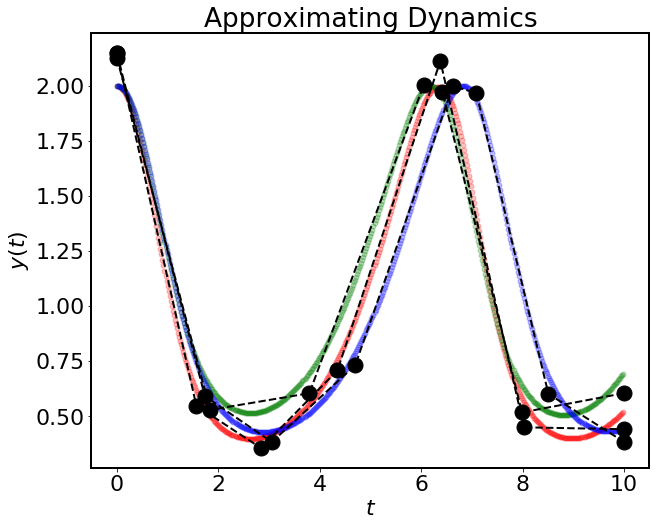

In [29]:
fig = plt.figure(figsize=(10,8))

chosen_obs = [0, 8, 10]
colors = ['r', 'g', 'b']

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    num_i_knots = int(0.5*(2+len(learn.obs_knots[i])))
    knots = np.copy(learn.obs_knots[i][num_i_knots:])
    knots = np.insert(knots, 0, learn.times[time_start_idx])
    knots = np.append(knots, learn.times[time_end_idx])
    plt.plot(knots, learn.obs_knots[i][:num_i_knots], 'k', linestyle='dashed', markersize=15, marker='o', linewidth=2)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Approximating Dynamics')    

Text(0.5, 1.0, 'Generating Filtered Data')

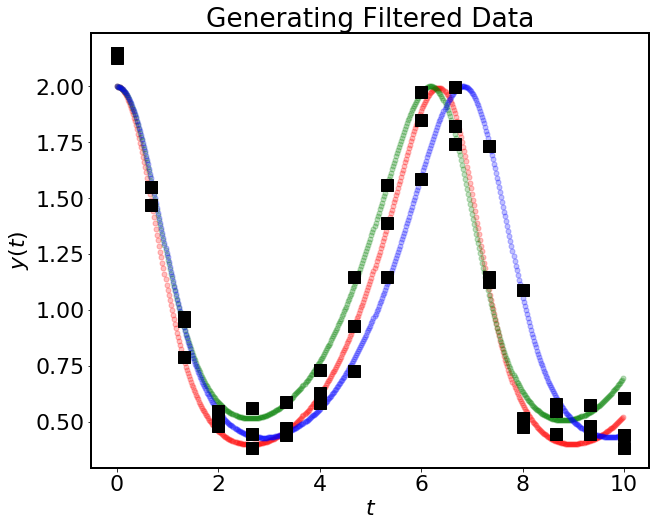

In [30]:
fig = plt.figure(figsize=(10,8))

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx], learn.observed_time_series[i,time_start_idx:time_end_idx],
             color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    plt.plot(learn.filtered_times, learn.filtered_obs[i,:],'k', linestyle='none', marker='s', 
            markersize=12)
    
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Generating Filtered Data')    

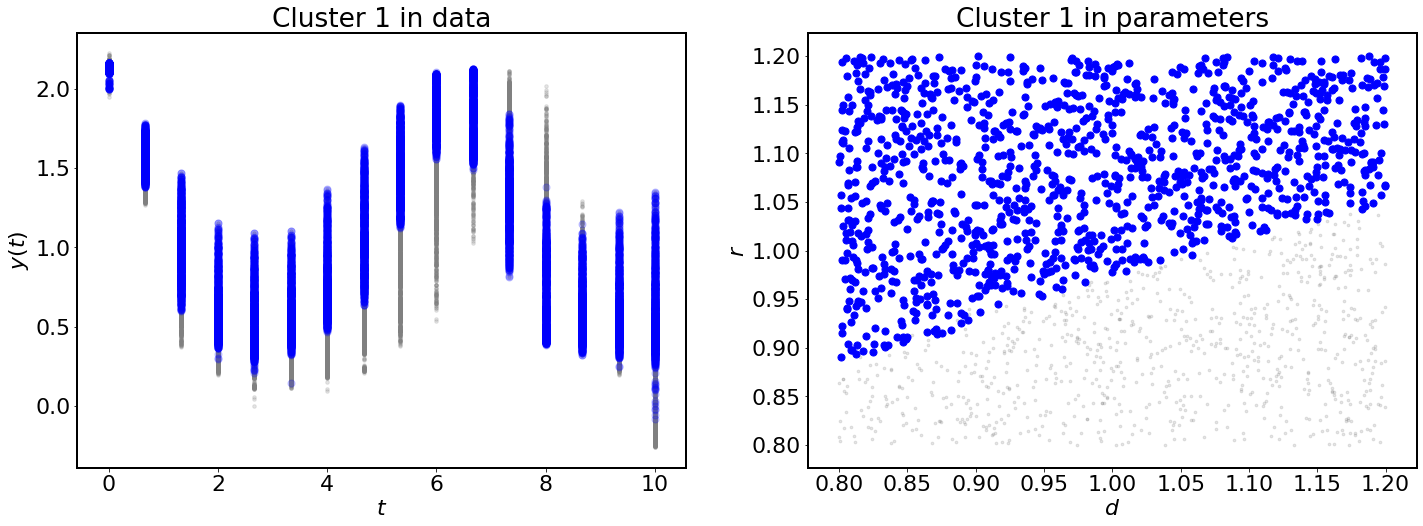

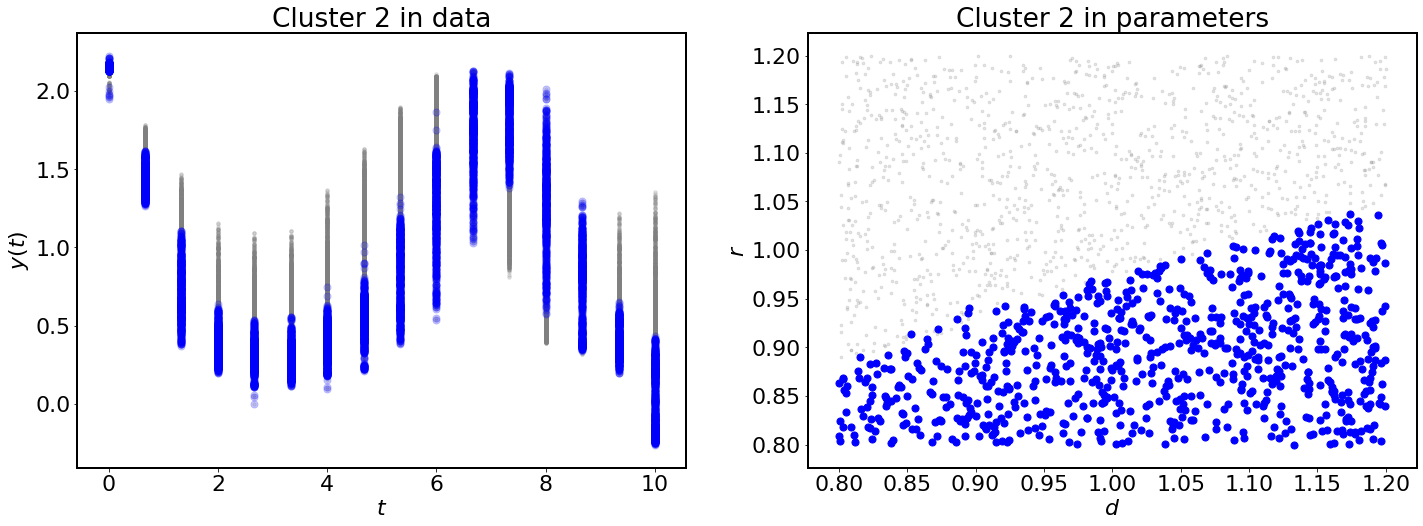

In [34]:
# # Plot clusters of predicted time series

for j in range(learn.num_clusters):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8), gridspec_kw={'width_ratios': [1, 1]}) 
    ax1.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 50, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    ax1.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 50, c='b', marker='o', alpha=0.2)
    ax1.set(title='Cluster ' + str(j+1) + ' in data')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$y(t)$')
    
    ax2.scatter(params[:,params_to_vary[0]], params[:,params_to_vary[1]], 30, c='gray', marker='.', alpha=0.2)
    ax2.scatter(params[idx,params_to_vary[0]], params[idx,params_to_vary[1]], 50, c='blue', marker='o')
    ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
    ax2.set_ylabel(param_labels[params_to_vary[0]])
    ax2.set_xlabel(param_labels[params_to_vary[1]])
    fig.tight_layout

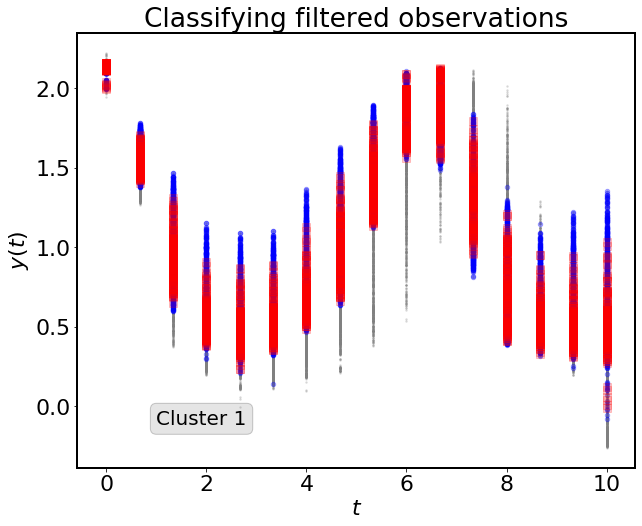

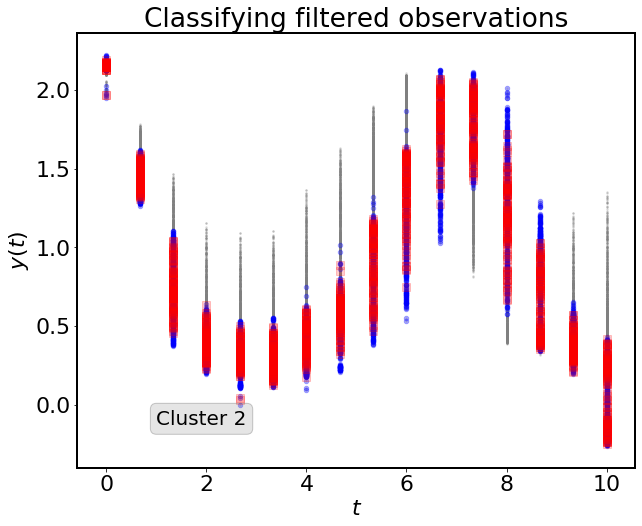

In [35]:
## # Plot oberved and predicted clusters

for j in range(learn.num_clusters):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(np.tile(learn.filtered_times,num_samples).reshape(num_samples,num_filtered_obs), 
                learn.filtered_predictions, 10, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_predictions[idx,:], 20, c='b', marker='o', alpha=0.3)
    idx = np.where(learn.obs_labels == j)[0]    
    plt.scatter(np.tile(learn.filtered_times,len(idx)).reshape(len(idx),num_filtered_obs), 
                learn.filtered_obs[idx, :], 50, c='r', marker='s', alpha=0.2)
    plt.title('Classifying filtered observations')
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    bottom, top = plt.gca().get_ylim()
    props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
    plt.text(1, (top-bottom)*0.1+bottom, 
             'Cluster ' + str(j+1), 
             {'color': 'k', 'fontsize': 20},
             bbox=props)
    plt.text
    fig.tight_layout

In [40]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=len(params_to_vary))

2 PCs explain 91.7068% of var. for cluster 1 with {'kernel': 'linear'}
2 PCs explain 47.8094% of var. for cluster 1 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 1 with {'kernel': 'sigmoid'}
2 PCs explain 71.3648% of var. for cluster 1 with {'kernel': 'poly'}
2 PCs explain 91.2244% of var. for cluster 1 with {'kernel': 'cosine'}
---------------------------------------------
Best kPCA for cluster  1  is  {'kernel': 'linear'}
2 PCs explain 91.7068% of variance.
---------------------------------------------
2 PCs explain 83.0766% of var. for cluster 2 with {'kernel': 'linear'}
2 PCs explain 41.5380% of var. for cluster 2 with {'kernel': 'rbf'}
{'kernel': 'sigmoid'}  not supported.
2 PCs explain 0.0000% of var. for cluster 2 with {'kernel': 'sigmoid'}
2 PCs explain 59.0314% of var. for cluster 2 with {'kernel': 'poly'}
2 PCs explain 79.7231% of var. for cluster 2 with {'kernel': 'cosine'}
---------------------------------------------

In [41]:
%reset -f out

def plot_gap(all_eig_vals, n, cluster):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    #Plotting until maximum number of knots
    eig_vals = all_eig_vals[cluster].lambdas_[0:10]
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals/np.sum(eig_vals)*100, Marker='.', MarkerSize=20, linestyle='')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'k--')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n+1]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'r--')
    plt.text(n+1, eig_vals[n]/np.sum(eig_vals)*150, 
             r'%2.3f' %(np.sum(eig_vals[0:n+1])/np.sum(eig_vals)*100) + '% of variation explained by first ' + '%1d' %(n+1) + ' PCs.', 
                                                               {'color': 'k', 'fontsize': 20})
    plt.text(n+2, eig_vals[n+1]/np.sum(eig_vals)*150, 
             r'Order of magnitude of gap is %4.2f.' %(np.log10(eig_vals[n])-np.log10(eig_vals[n+1])), 
                                                               {'color': 'r', 'fontsize': 20})
    s = 'Determining QoI for cluster #%1d' %(cluster+1)
    plt.title(s)
    plt.xlabel('Principal Component #')
    plt.ylabel('% of Variation')
    plt.xlim([0.1, np.size(eig_vals)+1])
    plt.ylim([0,500])


wd.interact(plot_gap, all_eig_vals=wd.fixed(learn.kpcas),
            n = wd.IntSlider(value=0, min=0, max=5),
            cluster = wd.IntSlider(value=0, min=0, max=learn.num_clusters-1))

Flushing output cache (4 entries)


interactive(children=(IntSlider(value=0, description='n', max=5), IntSlider(value=0, description='cluster', ma…

<function __main__.plot_gap(all_eig_vals, n, cluster)>

In [55]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

Diagnostic for clusters [sample average of ratios in each cluster]: [1.0057220502337934, 0.9702696860765753]


In [59]:
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(0,len(params_to_vary)):
    true_param_marginals.append(GKDE(params_obs[:,params_to_vary[i]]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], params_to_vary[i]], weights=learn.r[j]))
        
# for i in range(ics.shape[1]):
#     true_ic_marginals.append(GKDE(ics_obs[:,i]))
#     ic_marginals.append([])
#     for j in range(learn.num_clusters):
#         ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [60]:
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

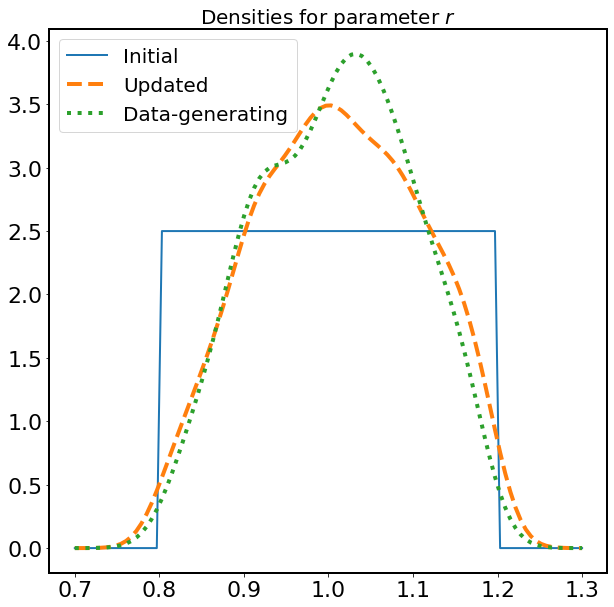

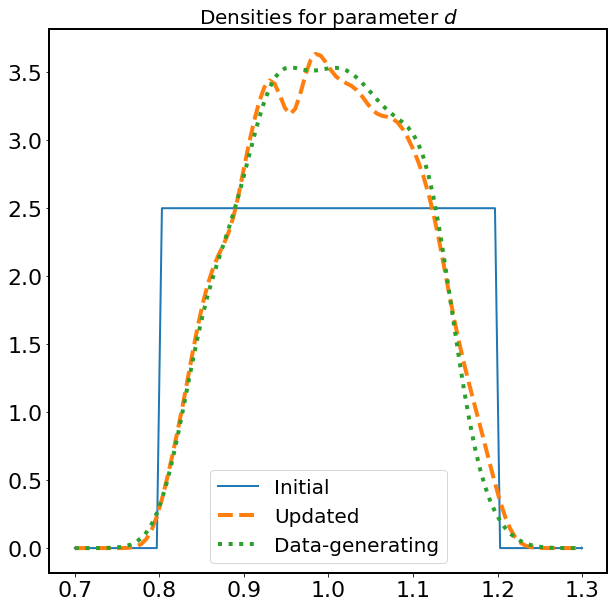

In [62]:
for i in range(0, len(params_to_vary)):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, params_to_vary[i]]), min(params_obs[:, params_to_vary[i]]))
    x_max = max(max(params[:, params_to_vary[i]]), max(params_obs[:, params_to_vary[i]]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[params_to_vary[i], :]),
         label = 'Initial', linewidth=2)
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
    plt.plot(x, true_param_marginals[i](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
    plt.title('Densities for parameter ' + param_labels[params_to_vary[i]], fontsize=20)
    plt.legend(fontsize=20)

In [63]:
# for i in range(ics.shape[1]):
#     fig = plt.figure(figsize=(10,10))
#     fig.clear()
#     x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
#     x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
#     delt = 0.25*(x_max - x_min)
#     x = np.linspace(x_min-delt, x_max+delt, 100)
#     plt.plot(x, unif_dist(x, ic_range[i, :]),
#          label = 'Initial')
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += ic_marginals[i][j](x) * cluster_weights[j]
#     plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
#     plt.plot(x, true_ic_marginals[i](x), label = 'Data-generating', linewidth=4, linestyle='dotted')
#     plt.title('Densities for initial condition ' + ic_labels[i], fontsize=20)
#     plt.legend(fontsize=20)

### Compute TV metric between densities

In [64]:
import scipy.integrate.quadrature as quad

In [66]:
def param_init_error(x):
    return np.abs(unif_dist(x,param_range[param_num, :])-true_param_marginals[param_num-2](x))

for i in params_to_vary:
    param_num=i
    TV_metric = quad(param_init_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.3663354698791043, 5.135713854187429e-09)
(0.3723511033064205, 9.604859463330229e-09)


In [67]:
def param_update_KDE_error(x):
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[param_num-2][j](x) * cluster_weights[j]
    return np.abs(mar-true_param_marginals[param_num-2](x))

for i in params_to_vary:
    param_num=i
    TV_metric = quad(param_update_KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.08745470365589755, 1.1478018882571384e-08)
(0.042024003106235594, 3.9018838923765564e-09)


In [21]:
from scipy.stats import beta 

In [68]:
def KDE_error(x):
    true_beta = beta(a=true_a, b=true_b,loc=param_range[i,0],scale=param_range[i,1]-param_range[i,0])
    return np.abs(true_beta.pdf(x)-true_param_marginals[param_num-2](x))

for i in params_to_vary:
    param_num=i
    TV_metric = quad(KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.09633061416747782, 3.875361295757607e-09)
(0.05018280272464763, 3.905262148384825e-09)


### Compute KL divergence

In [23]:
# def KL_margs_init(x):
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  unif_dist(x,param_range[param_num, :])))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)

In [24]:
# def KL_margs_updated(x):
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += param_marginals[param_num][j](x) * cluster_weights[j]
#     return true_param_marginals[param_num](x)*\
#                 np.log(np.divide(true_param_marginals[param_num](x),
#                                  mar))

# for i in range(params.shape[1]):
#     param_num=i
#     KL = quad(KL_margs_updated,param_range[i,0]-0.1,param_range[i,1]+0.1,maxiter=1000)
#     print(KL)